In [3]:
import sys
import math, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import linalg as LA
import numpy as np


#infile =['/users/timeifler/Dropbox/cosmolike_store/WFIRST_forecasts/cov/cov_WFIRST_Ncl25_4clusterbins_nrichmin25_source_Dec17']
#infile =['/users/timeifler/Dropbox/cosmolike_store/WFIRST_forecasts/cov/cov_WFIRST_Ncl25_4clusterbins_highz_nrichmin25_source_Dec30_ngalclustering107_finebin_none']
infile =['/users/timeifler/Dropbox/cosmolike_store/WFIRST_forecasts/cov/WFIRST_LSST_Feb9']
data= ['datav/WFIRST_all_2pt_clusterN_clusterWL_fid_SN10']
outname=['WFIRST']

# the numbers below can be computed knowing the data vector settings, e.g. 10 tomographic source bins results in 55 shear-shear power spectra. Or they can be read off when running the covariance code, i.e. type 'compute_covariance_fourier 100000' and look for the output mentioning number of ggl bins accepted and/or number of cluster weka lensing bins accepted. The default numbers below most likely don't correspond to your binning choices.
nggl = 32 	# number of ggl power spectra
ngcl = 22	# number of cluster-source galaxy power spectra
nlens = 10 	# number of lens bins 
nlenscl= 4 	# number of cluster redshift bins 
nshear = 55 # number of shear tomographic power spectra
ncl=25		# number of ell-bins
nclgcl=5	# number of cluster ell-bins
nrich=4 	# number of richness bins


ndata = (nshear+nggl+nlens)*ncl+nlenscl*nrich+nrich*ngcl*nclgcl 
n2pt = (nshear+nggl+nlens)*ncl 
ncluster = nlenscl*nrich 
n2ptcl=n2pt+ncluster
nclusterN_WL=ncluster+nrich*ngcl*nclgcl

for k in range(0,1):
    datafile= np.genfromtxt(data[k])
    mask = np.zeros(ndata)
    for i in range(0,datafile.shape[0]):
        if (datafile[i,1] >1.0e-15): 
            mask[i]=1.0

    covfile = np.genfromtxt(infile[k])
    cov = np.zeros((ndata,ndata))

    print ndata,n2pt,int(np.max(covfile[:,0])+1)

    for i in range(0,covfile.shape[0]):
        cov[int(covfile[i,0]),int(covfile[i,1])] = covfile[i,8]+covfile[i,9]
        cov[int(covfile[i,1]),int(covfile[i,0])] = covfile[i,8]+covfile[i,9]
        
    
    

2881 2425 2881


In [4]:
    cor = np.zeros((ndata,ndata))
    for i in range(0,ndata):
        for j in range(0,ndata):
            if (cov[i,i]*cov[j,j] >0):
                cor[i,j] = cov[i,j]/math.sqrt(cov[i,i]*cov[j,j])

    np.set_printoptions(threshold=np.nan)
# compute eigenvalues and eigenvectors of correlation matrix
    w, v = LA.eigh(cor)
# sort values according to size from low to high
    a=np.sort(w)
    print "min+max eigenvalues full cor:"
    print np.min(a), np.max(a)
    print "neg eigenvalues full cor:"
    for i in range(0,a.shape[0]):
        if (a[i]< 0.0): 
            print a[i]
                
# print the indices of the eigenvector corresponding to negative eigenvalues sorted from high absolute value to low absolute value (i.e. in reversed sorting order)   
    print "indices of the eigenvector corresponding to negative eigenvalues sorted from high absolute value to low:"
    for i in range(0,a.shape[0]):
        if (a[i]< 0.0):
            contaminated=np.argsort(np.fabs((v[:,i])))[::-1]
            print repr(contaminated)


min+max eigenvalues full cor:
0.00031151695488209214 130.01868668471892
neg eigenvalues full cor:
indices of the eigenvector corresponding to negative eigenvalues sorted from high absolute value to low:


/Users/timeifler/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


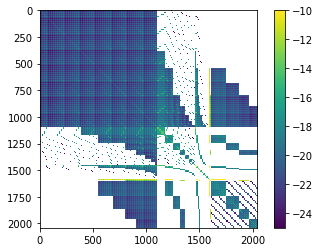

In [11]:
# clustering_start=(nshear+nggl)*ncl
# clustering_end=n2pt

maskindices=np.where(mask == 0)[0]
covnew=np.delete(cov, maskindices, 0)
covcut=np.delete(covnew, maskindices, 1)

# # compute eigenvalues and eigenvectors of correlation matrix
# w, v = LA.eigh(corcut)
# # sort values according to size from low to high
# b=np.sort(w)
# print "min+max eigenvalues covcut:"
# print np.min(b), np.max(b)
# print "neg eigenvalues covcut:"
# for i in range(0,b.shape[0]):
#     if (b[i]< 0.0): 
#         print b[i]
            
            
covzero=np.where(covcut == 0)[0]
covzero
plt.figure()
plt.imshow(np.log10(np.abs(covcut[:,:])), interpolation="nearest",vmin=-25, vmax=-10)
plt.colorbar()
plt.savefig('plots/cov_cut.png', format='png', dpi=2000)

# plt.figure()
# plt.imshow(np.log10(cov[:,:]), interpolation="nearest",vmin=-25, vmax=-10)
# plt.colorbar()
# plt.savefig('plots/cov.png', format='png', dpi=5000)

# plt.figure()
# plt.imshow(cor[n2pt:n2pt+ncluster,n2pt:n2pt+ncluster], interpolation="nearest",vmax=1)
# plt.colorbar()
# plt.savefig('plots/cor.png', format='png', dpi=5000)

# plt.figure()
# plt.imshow(cor[:,:], interpolation="nearest",vmax=5)
# plt.colorbar()
# plt.savefig('plots/corr.png', format='png', dpi=5000)

In [18]:
# exclude=[919,  918,  889,  888,  917,  887,  844,  828,  843,  829,  859,
#         916,  886,  827,  858,  842,  826]

# cov2 = np.copy(cov)
# for i in range(0,len(exclude)): 
#     cov2[int(exclude[i]),:]=0.0
#     cov2[:,int(exclude[i])]=0.0
#     cov2[int(exclude[i]),int(exclude[i])]=1.0
    
# cor2 = np.zeros((ndata,ndata))
# for i in range(0,ndata):
#     for j in range(0,ndata):
#         if (cov2[i,i]*cov2[j,j] >0):
#             cor2[i,j] = cov2[i,j]/math.sqrt(cov2[i,i]*cov2[j,j])
        
# # compute eigenvalues and eigenvectors of correlation matrix
# w2, v2 = LA.eigh(cor2)
# # sort values according to size from low to high
# a2=np.sort(w2)
# print "min+max eigenvalues full cor:"
# print np.min(a2), np.max(a2)
# print "neg eigenvalues full cor:"
# for i in range(0,a2.shape[0]):
#     if (a2[i]< 0.0): 
#         print a2[i]

In [43]:
def get_index_info(index):
    if((index>0) & (index <= nshear*ncl)): 
        print "Problem in WL data vector"
    if((index > nshear*ncl) & (index <= (nshear+nggl)*ncl)): print "Problem in GGL data vector"
    if((index>(nshear+nggl)*ncl) & (index < n2pt-1)): print "Problem in Clustering data vector"
    
    if((index>n2pt) & (index<=n2ptcl)): 
        print "Problem in ClusterN data vector"
    if((index>n2ptcl) & (index < ndata-1)): print "Problem in ClusterWL data vector"

get_index_info(2516)
print n2pt, n2ptcl 

Problem in ClusterN data vector
2500 2516
